# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
import seaborn as sn

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities[1]

'katsuura'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "Imperial"
#api.openweathermap.org/data/2.5/weather?q=cities[0]&appid={weather_api_key}
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
response = requests.get(url).json()
pprint(response)



{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 62.59, 'lon': 40.61},
 'dt': 1588998450,
 'id': 504187,
 'main': {'feels_like': 36.7,
          'grnd_level': 993,
          'humidity': 67,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 43.18,
          'temp_max': 43.18,
          'temp_min': 43.18},
 'name': 'Puksoozero',
 'sys': {'country': 'RU', 'sunrise': 1588984505, 'sunset': 1589046776},
 'timezone': 10800,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 157, 'speed': 5.41}}


In [4]:

city_name = []
city_id = []
city_temp = []
city_lat = []
city_lon = []
city_hum = []
city_clouds = []
city_temp_max = []
city_wind = []
city_country = []
city_hem = []
city_ideal = []
units = "Imperial"

for city in cities:
    
    try:
        #api.openweathermap.org/data/2.5/weather?q=cities[0]&appid={weather_api_key}
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
        response = requests.get(url).json()
        #pprint(response)
        city_name.append(response['name'])
        city_id.append(response['id'])
        city_temp.append(response['main']['temp'])
        city_lat.append(response['coord']['lat'])
        this_lat = response['coord']['lat']

        city_lon.append(response['coord']['lon'])
        city_hum.append(response['main']['humidity'])
        city_clouds.append(response['clouds']['all'])
        this_clouds = response['clouds']['all']
        city_temp_max.append(response['main']['temp_max'])
        this_temp_max = response['main']['temp_max']
        city_wind.append(response['wind']['speed'])
        this_wind = response['wind']['speed']
        city_country.append(response['sys']['country'])

        if this_lat >= 0:
            city_hem.append('North')
        else:
            city_hem.append('South')

        #Narrow down the DataFrame to find your ideal weather condition. For example:
        #A max temperature lower than 80 degrees but higher than 70.
         # * Wind speed less than 10 mph.
        #  * Zero cloudiness.

        if (this_wind < 10) and (this_clouds == 0) and (this_temp_max >70 and this_temp_max < 80):
            city_ideal.append('True')
        else:
            city_ideal.append('False')
    except:
        pass
    
    


 

In [5]:
dict = {'name':city_name, 
        'country': city_country,
        'id': city_id, 
        'hem':city_hem,
        'temp':city_temp,
        'lat': city_lat,
        'lon': city_lon,
        'humidity': city_hum,
        'clouds' : city_clouds,
        'max_temp':city_temp_max,
        'wind':city_wind,
        'ideal':city_ideal
        } 
  
city_df = pd.DataFrame(dict) 


In [6]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 12 columns):
name        573 non-null object
country     573 non-null object
id          573 non-null int64
hem         573 non-null object
temp        573 non-null float64
lat         573 non-null float64
lon         573 non-null float64
humidity    573 non-null int64
clouds      573 non-null int64
max_temp    573 non-null float64
wind        573 non-null float64
ideal       573 non-null object
dtypes: float64(5), int64(3), object(4)
memory usage: 53.8+ KB


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_df.to_csv('weather_data.csv')


In [8]:
city_df

,name,country,id,hem,temp,lat,lon,humidity,clouds,max_temp,wind,ideal
0,Noril'sk,RU,1497337,North,33.80,69.35,88.20,100,90,33.80,17.90,False
1,Katsuura,JP,2112309,North,68.14,35.13,140.30,56,100,69.01,5.99,False
2,Hithadhoo,MV,1282256,South,85.24,-0.60,73.08,79,99,85.24,14.72,False
3,Xucheng,CN,1787837,North,98.60,20.35,110.13,53,26,98.60,6.71,False
4,Hilo,US,5855927,North,76.01,19.73,-155.09,61,1,78.80,6.93,False
...,...,...,...,...,...,...,...,...,...,...,...,...
568,Bluefields,NI,3620680,North,79.09,12.01,-83.76,92,100,79.09,6.42,False
569,Ust'-Kut,RU,2013923,North,52.77,56.79,105.77,42,72,52.77,8.32,False
570,Eidsvåg,NO,3158615,North,38.30,62.78,8.07,93,87,39.20,9.17,False
571,Erlangen,DE,2929567,North,49.15,49.59,11.00,81,95,53.01,1.12,False


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
filt = city_df["humidity"]>100
filt

0      False
1      False
2      False
3      False
4      False
       ...  
568    False
569    False
570    False
571    False
572    False
Name: humidity, Length: 573, dtype: bool

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_citydf= city_df.where(filt, inplace = False) 
clean_citydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 12 columns):
name        0 non-null object
country     0 non-null object
id          0 non-null float64
hem         0 non-null object
temp        0 non-null float64
lat         0 non-null float64
lon         0 non-null float64
humidity    0 non-null float64
clouds      0 non-null float64
max_temp    0 non-null float64
wind        0 non-null float64
ideal       0 non-null object
dtypes: float64(8), object(4)
memory usage: 53.8+ KB


In [11]:
# Extract relevant fields from the data frame
#THERE ARE NO 100 HUMIDITY CITIES

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

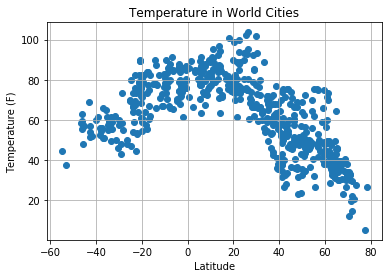

In [12]:
lats = city_df['lat']
temps = city_df['temp']

# Build a scatter plot for each data type
plt.scatter(lats, temps, marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

OBSERVATION - All of the hotter cities are between 0 and 30 deg latitude. This is a parabolic relationship

## Latitude vs. Humidity Plot

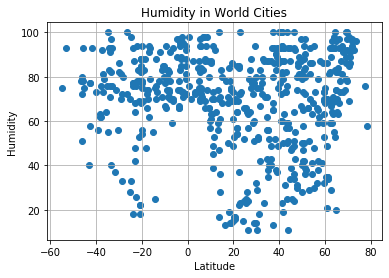

In [13]:
hum = city_df['humidity']

# Build a scatter plot for each data type
plt.scatter(lats, hum, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

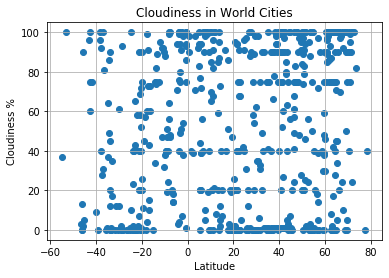

In [14]:
clouds = city_df['clouds']

# Build a scatter plot for each data type
plt.scatter(lats, clouds, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

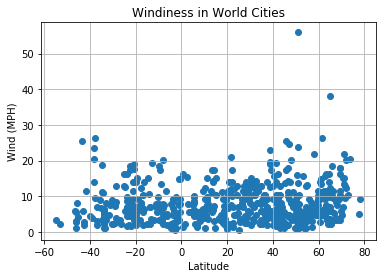

In [15]:
wind = city_df['wind']

# Build a scatter plot for each data type
plt.scatter(lats, wind, marker="o")

# Incorporate the other graph properties
plt.title("Windiness in World Cities")
plt.ylabel("Wind (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

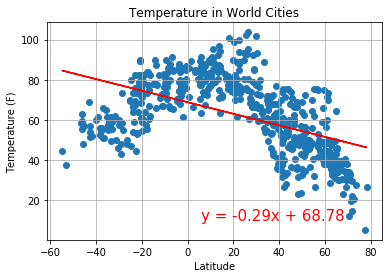

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = city_df['lat']
y_values = city_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()



#plt.scatter(lats, temps, marker="o")

# Incorporate the other graph properties


# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames

north_df = city_df.loc[(city_df['hem'] == 'North')]
north_df

south_df = city_df.loc[(city_df['hem'] == 'South')]
south_df

,name,country,id,hem,temp,lat,lon,humidity,clouds,max_temp,wind,ideal
2,Hithadhoo,MV,1282256,South,85.24,-0.60,73.08,79,99,85.24,14.72,False
5,Caravelas,BR,3466980,South,73.29,-17.71,-39.25,72,99,73.29,12.39,False
8,Soe,ID,1626703,South,78.24,-9.86,124.28,67,38,78.24,7.83,False
10,Conceição das Alagoas,BR,3465764,South,61.09,-19.91,-48.39,83,26,61.09,3.29,False
11,Mataura,NZ,6201424,South,55.53,-46.19,168.86,80,0,55.53,2.89,False
...,...,...,...,...,...,...,...,...,...,...,...,...
559,San Vicente,AR,3428068,South,48.20,-26.62,-54.13,72,0,48.20,2.19,False
560,Te Anau,NZ,2181625,South,56.80,-45.42,167.72,75,5,56.80,4.16,False
563,Iporá,BR,3461090,South,62.02,-16.44,-51.12,93,60,62.02,6.29,False
564,Kudus,ID,1639215,South,91.40,-6.80,110.84,59,20,91.40,11.41,False


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

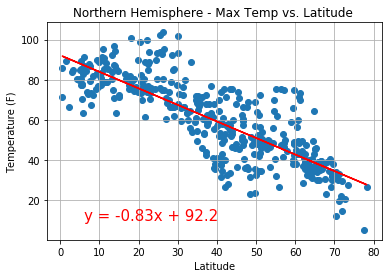

In [18]:
#lats = north_df['lat']
#temps = north_df['temp']

x_values = north_df['lat']
y_values = north_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Max Temp vs. Latitude ")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInNHemCities.png")

# Show plot
plt.show()

#There appears to be a strong (neg) linear correlation between max temp and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

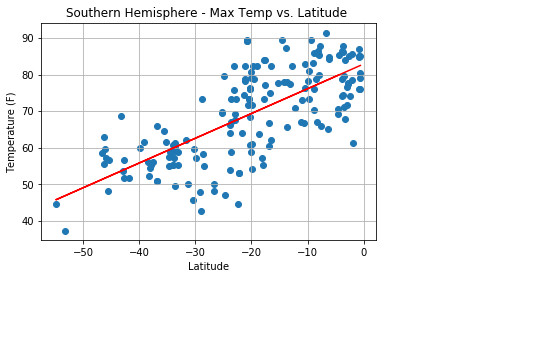

In [19]:
#lats = south_df['lat']
#temps = south_df['temp']

x_values = south_df['lat']
y_values = south_df['temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Max Temp vs. Latitude ")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInSHemCities.png")

# Show plot
plt.show()

In [20]:
#There appears to be a (pos) linear correlation between max temp and latitude in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

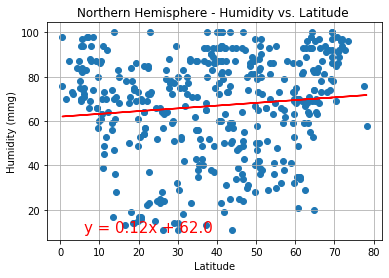

In [21]:
x_values = north_df['lat']
y_values = north_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity vs. Latitude ")
plt.ylabel("Humidity (mmg)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumInNHemCities.png")

# Show plot
plt.show()

In [22]:
#There does not appear to be a correlation between latitude and humidity in the Northern Hemisphere. Most of the values appear to be between 60 and 85.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

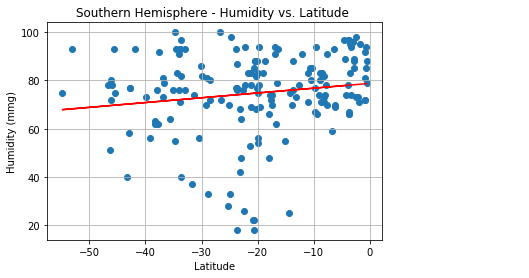

In [23]:
x_values = south_df['lat']
y_values = south_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity vs. Latitude ")
plt.ylabel("Humidity (mmg)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumInSHemCities.png")

# Show plot
plt.show()

In [24]:
#There does not appear to be a correlation between latitude and humidity in the Southern Hemisphere. Most of the values appear to be between 60 and 90.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

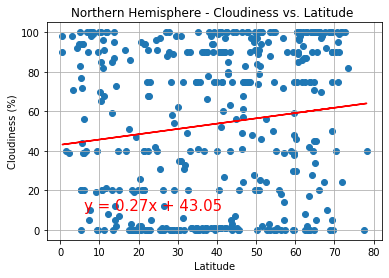

In [25]:
x_values = north_df['lat']
y_values = north_df['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness vs. Latitude ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInNHemCities.png")

# Show plot
plt.show()

In [26]:
#There does not appear to be a correlation between latitude and cloudiness in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

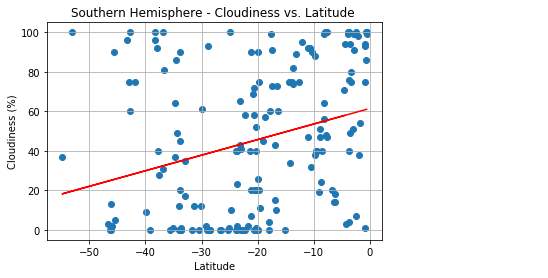

In [27]:
x_values = south_df['lat']
y_values = south_df['clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness vs. Latitude ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInSHemCities.png")

# Show plot
plt.show()

In [28]:
#There does not appear to be a correlation between latitude and cloudiness in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

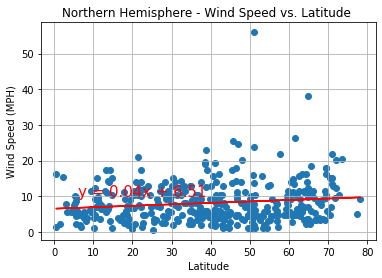

In [29]:
x_values = north_df['lat']
y_values = north_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed vs. Latitude ")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInNHemCities.png")

# Show plot
plt.show()

In [30]:
#There does not appear to be a correlation between latitude and wind speed in the Northern Hemisphere. Wind speeds appear to range from 0 to about 15 MPH

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

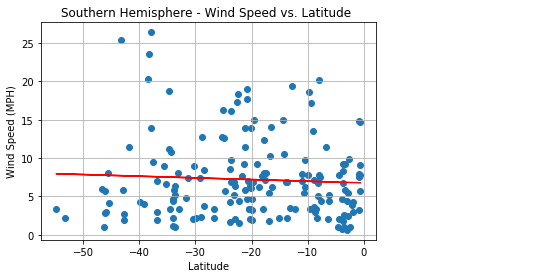

In [31]:
x_values = south_df['lat']
y_values = south_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed vs. Latitude ")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInSHemCities.png")

# Show plot
plt.show()

In [32]:
#It appears that in the Southern Hemisphereit seems to get windier as you move away from the equator. Wind speeds appear to range from 0 to about 10 MPH

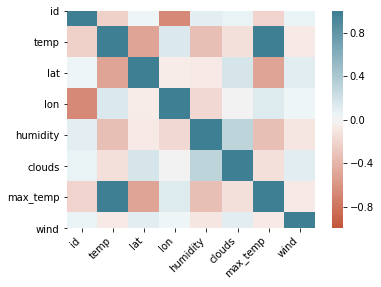

In [35]:
corr = city_df.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
This is a correlation heat map. Darker the color, the stronger the correlation. there appears to be a negative correlation between temp and max temp and latitude. 
There appear to be correlations between latitude. There appears to be some ligher correlations between humdity temperature. There appears to be a correlation between logitude and id (not sure why)
